# Introduction to regression with neural networks in tensorflow

We're going to predict a number using regression with tensorflow

In [15]:
import tensorflow as tf
print(tf.__version__)

2.19.0


### Creating data to view and fit

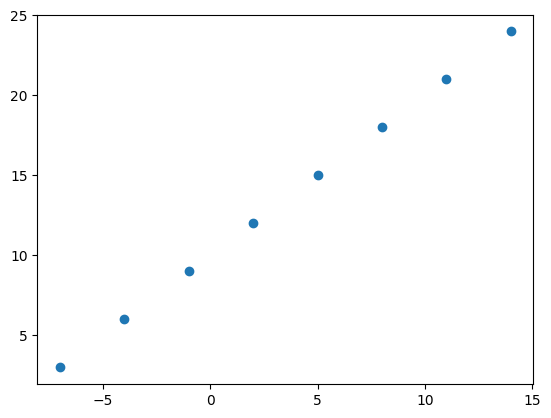

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [17]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [18]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [19]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [20]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
input_shape = X[0].shape
input_shape

TensorShape([])

## Steps in modelling with TensorFlow

1. Creating a model - define input and output layers, as well as the hidden layers
2. Compiling a model - define the loss function and optimiser
3. Fitting a model - leting a model try to find patterns between X & y (features and labels).

<img src="./steps-in-modelling.png">

<img src="./modeling.png">

In [22]:
# set random seed
tf.random.set_seed(42)

#Fix the data shape - both X and y need to by 2D
X = tf.expand_dims(X,axis=1) #Shape: (8,1)
y = tf.expand_dims(y,axis=1) #Shape: (8,1)

#1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=10) 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 8.6755 - mae: 8.6755
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.5430 - mae: 8.5430
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.4105 - mae: 8.4105
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2780 - mae: 8.2780
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1455 - mae: 8.1455
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0130 - mae: 8.0130
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.8805 - mae: 7.8805
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.7480 - mae: 7.7480
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6155 - mae: 7.6155
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.4830 - mae: 7.4830


In [23]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[29.483496]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [24]:
# Let's rebuild the model
#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),  # Fixed: "optimzer" -> "optimizer"
              metrics=["mae"])

# Fit the model (we'll train this time longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 11.4638 - mae: 11.4638
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.3313 - mae: 11.3313
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.1988 - mae: 11.1988
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.0663 - mae: 11.0663
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.9338 - mae: 10.9338
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.8013 - mae: 10.8013
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.6688 - mae: 10.6688
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.5363 - mae: 10.5363
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.4038 - mae: 10.4038
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.2713 - mae: 10.2713
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.1388 - mae: 10.1388
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.0063 - mae: 10.0063
Epoch 13/100
1/1 ━━━━━━━

In [25]:
# look at the data again
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [26]:
# Checking if prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[29.760126]], dtype=float32)

In [27]:
#Let's try to improve the model (with extra hidden layer - 100 hidden units)

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 14.4073 - mae: 14.4073
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.9187 - mae: 13.9187
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.4405 - mae: 13.4405
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.9639 - mae: 12.9639
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.4860 - mae: 12.4860
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.0064 - mae: 12.0064
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5139 - mae: 11.5139
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.0035 - mae: 11.0035
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.4747 - mae: 10.4747
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9274 - mae: 9.9274
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.3499 - mae: 9.3499
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.7378 - mae: 8.7378
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [28]:
# Let's try to predict
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[32.72446]], dtype=float32)